In [90]:
using DataFrames
using CSV
using StatsPlots
using Statistics
using GLM

In [67]:
insurance = CSV.read("insurance.csv",categorical = true); 
insurance = dropmissing(insurance, disallowmissing=true); 

In [57]:
first(insurance, 5)

,age,sex,bmi,children,smoker,region,charges
,Int64⍰,Categorical…⍰,Float64⍰,Int64⍰,Categorical…⍰,Categorical…⍰,Float64⍰
1,19,female,27.9,0,yes,southwest,16884.9
2,18,male,33.77,1,no,southeast,1725.55
3,28,male,33.0,3,no,southeast,4449.46
4,33,male,22.705,0,no,northwest,21984.5
5,32,male,28.88,0,no,northwest,3866.86


In [58]:
describe(insurance)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,age,39.207,18,39.0,64,,0,Int64
2,sex,,female,,male,2,0,CategoricalString{UInt32}
3,bmi,30.6634,15.96,30.4,53.13,,0,Float64
4,children,1.09492,0,1.0,5,,0,Int64
5,smoker,,yes,,no,2,0,CategoricalString{UInt32}
6,region,,southwest,,northeast,4,0,CategoricalString{UInt32}
7,charges,13270.4,1121.87,9382.03,63770.4,,0,Float64


In [59]:
summary(insurance.charges)

"1338-element Array{Union{Missing, Float64},1}"

In [60]:
describe(insurance.charges)

Summary Stats:
Length:         1338
Type:           Union{Missing, Float64}
Number Unique:  1337


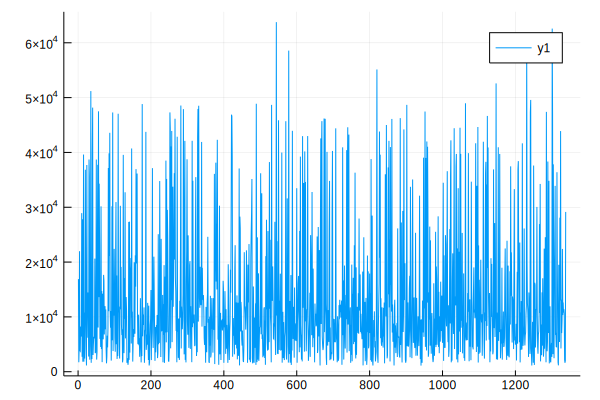

In [61]:
gr()
plot(insurance.charges)

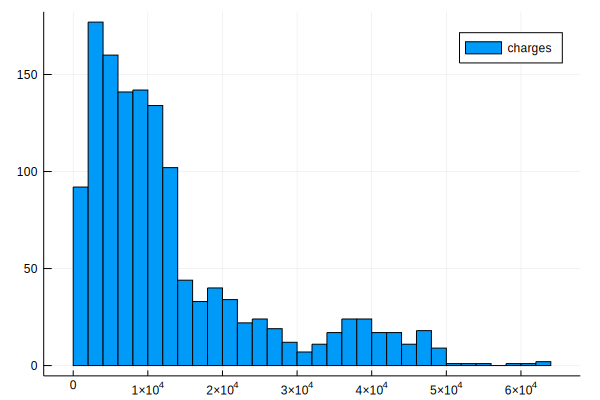

In [62]:
gr()
histogram(insurance.charges, label="charges")

In [68]:
# 从 dataframe 中取出 4 列
age = insurance[:age];
bmi = insurance[:bmi];
children = insurance[:children];
charges = insurance[:charges]

# 组合成 matrix，注意，这里是列向量
m = hcat(age, bmi, children, charges); 

In [73]:
# 计算相关系数
cor(m, dims=1)

4×4 Array{Float64,2}:
 1.0       0.109272   0.042469   0.299008 
 0.109272  1.0        0.0127589  0.198341 
 0.042469  0.0127589  1.0        0.0679982
 0.299008  0.198341   0.0679982  1.0      

In [96]:
a = insurance[:age] .* insurance[:age]
insurance[:age2] = a; 

b = [ i >= 30 ? 1 : 0 for i in insurance[:bmi] ] 
insurance[:bmi30] = b;

first(insurance, 5)

,age,sex,bmi,children,smoker,region,charges,age2,bmi30
,Int64,Categorical…,Float64,Int64,Categorical…,Categorical…,Float64,Int64,Int64
1,19,female,27.9,0,yes,southwest,16884.9,361,0
2,18,male,33.77,1,no,southeast,1725.55,324,1
3,28,male,33.0,3,no,southeast,4449.46,784,1
4,33,male,22.705,0,no,northwest,21984.5,1089,0
5,32,male,28.88,0,no,northwest,3866.86,1024,0


In [101]:
ins_model1 = lm(@formula(charges~age+age2+children+bmi+sex+bmi30*smoker+region), insurance)


StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: charges ~ 1 + age + age2 + children + bmi + sex + bmi30 + smoker + region + bmi30 & smoker

Coefficients:
                    Estimate Std.Error   t value Pr(>|t|)
(Intercept)          12316.3   1414.27   8.70856   <1e-17
age                 -32.6851   59.8242 -0.546354   0.5849
age2                 3.73158  0.746299    5.0001    <1e-6
children             678.561   105.883   6.40859    <1e-9
bmi                   120.02    34.266   3.50258   0.0005
sex: male           -496.824   244.366  -2.03312   0.0422
bmi30                18810.6   637.819   29.4921   <1e-99
smoker: no          -13404.7   439.949  -30.4687   <1e-99
region: southeast    394.097   345.799   1.13967   0.2546
region: northwest     943.44   350.172   2.69422   0.0071
region: northeast    1222.64   350.528     3.488   0.0005
bmi30 & smoker: no  -19

In [103]:
ins_model2 = lm(@formula(charges~age2+children+bmi+sex+bmi30&smoker+region), insurance)


StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: charges ~ 1 + age2 + children + bmi + sex + region + bmi30 & smoker

Coefficients:
                     Estimate Std.Error  t value Pr(>|t|)
(Intercept)           1422.12   1219.02  1.16661   0.2436
age2                  3.32999  0.141843  23.4765   <1e-99
children              711.409   131.538  5.40837    <1e-7
bmi                   89.4093   44.5939  2.00497   0.0452
sex: male            -334.104   318.317 -1.04959   0.2941
region: southeast     1087.59   449.582  2.41912   0.0157
region: northwest     1204.44   456.117  2.64064   0.0084
region: northeast     1579.52   456.475  3.46026   0.0006
bmi30 & smoker: yes   29678.7   688.551  43.1032   <1e-99
bmi30 & smoker: no   -3491.03   539.309 -6.47315    <1e-9


In [104]:
ins_model2 = lm(@formula(charges~age2+children+bmi+sex+bmi30*smoker+region), insurance)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: charges ~ 1 + age2 + children + bmi + sex + bmi30 + smoker + region + bmi30 & smoker

Coefficients:
                    Estimate Std.Error  t value Pr(>|t|)
(Intercept)          11767.3   995.014  11.8263   <1e-30
age2                 3.32819  0.108832  30.5809   <1e-99
children             661.137   100.939  6.54985   <1e-10
bmi                  119.272   34.2297  3.48446   0.0005
sex: male           -495.747   244.293 -2.02931   0.0426
bmi30                18824.5   637.144  29.5451   <1e-99
smoker: no          -13404.4   439.832 -30.4762   <1e-99
region: southeast    395.508   345.698  1.14409   0.2528
region: northwest    944.887    350.07  2.69914   0.0070
region: northeast    1222.64   350.436  3.48892   0.0005
bmi30 & smoker: no  -19810.1   604.495 -32.7712   <1e-99


In [88]:
data = DataFrame(X=[1,2,3], Y=[2,4,7])
ols = lm(@formula(Y ~ X), data)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ 1 + X

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -0.666667   0.62361 -1.06904   0.4788
X                  2.5  0.288675  8.66025   0.0732


In [89]:
(stderror(ols), predict(ols))

([0.62361, 0.288675], [1.83333, 4.33333, 6.83333])

In [91]:
r2(ols)

0.9868421052631579

In [94]:
names(GLM)

83-element Array{Symbol,1}:
 Symbol("@formula")
 :AbstractContrasts
 :Bernoulli        
 :Binomial         
 :CauchitLink      
 :CloglogLink      
 :ContrastsCoding  
 :DensePred        
 :DensePredChol    
 :DensePredQR      
 :DummyCoding      
 :EffectsCoding    
 :Formula          
 ⋮                 
 :nobs             
 :nulldeviance     
 :nullloglikelihood
 :predict          
 :r2               
 :residuals        
 :r²               
 :setcontrasts!    
 :stderror         
 :updateμ!         
 :vcov             
 :wrkresp          

In [112]:
?fit

search: fit fit! filter filter! confint first firstindex isfinite popfirst!



```
fit(Histogram, data[, weight][, edges]; closed=:left, nbins)
```

Fit a histogram to `data`.

# Arguments

  * `data`: either a vector (for a 1-dimensional histogram), or a tuple of vectors of equal length (for an *n*-dimensional histogram).
  * `weight`: an optional `AbstractWeights` (of the same length as the data vectors), denoting the weight each observation contributes to the bin. If no weight vector is supplied, each observation has weight 1.
  * `edges`: a vector (typically an `AbstractRange` object), or tuple of vectors, that gives the edges of the bins along each dimension. If no edges are provided, these are determined from the data.

# Keyword arguments

  * `closed`: if `:left` (the default), the bin intervals are left-closed [a,b); if `:right`, intervals are right-closed (a,b].
  * `nbins`: if no `edges` argument is supplied, the approximate number of bins to use along each dimension (can be either a single integer, or a tuple of integers).

# Examples

```julia
# Univariate
h = fit(Histogram, rand(100))
h = fit(Histogram, rand(100), 0:0.1:1.0)
h = fit(Histogram, rand(100), nbins=10)
h = fit(Histogram, rand(100), weights(rand(100)), 0:0.1:1.0)
h = fit(Histogram, [20], 0:20:100)
h = fit(Histogram, [20], 0:20:100, closed=:right)

# Multivariate
h = fit(Histogram, (rand(100),rand(100)))
h = fit(Histogram, (rand(100),rand(100)),nbins=10)
```

---

Fit a statistical model.
